In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
data1 = pd.read_csv("data1.csv")
data2 = pd.read_csv("data2.csv")

In [3]:
data1.head(3)

,DateTime,Ni1,S1,Fe3O41,Ni2,S2,Fe3O42,Ni3,S3,Fe3O43,...,ro2,ro3,ro4,ro_final,ust1,ust2,ust3,ust4,v_final,level_final
0,2021-01-01 00:00:00,5.45,22.39,1.5,3.87,17.52,1.7,8.62,13.21,5.0,...,1.68910,2.0167,1.86565,1.8684,0.0,0.0,44,97.0,179,69.2796
1,2021-01-01 00:01:00,5.45,22.39,1.5,3.87,17.52,1.7,8.62,13.21,5.0,...,1.69955,2.0290,1.86145,1.8752,0.0,0.0,44,97.0,179,69.1331
2,2021-01-01 00:02:00,5.45,22.39,1.5,3.87,17.52,1.7,8.62,13.21,5.0,...,1.69980,2.0453,1.85210,1.8635,0.0,0.0,44,97.0,179,66.7399


In [4]:
data1[data1.duplicated(keep='first')].shape

(168, 27)

In [5]:
data1 = data1.drop_duplicates(keep = 'first') # Удаление полностью повторяющихся строк

In [6]:
data1_duplicates = data1[data1.duplicated(subset=['DateTime'], keep = False)] # Разные записи в одно время

В датасете нашлись как полностью совпадающие объекты, так и разные записи в одно и то же время. Первые достаточно свести к одному значению, а вторые необходимо обработать, чтобы не возникало ошибок при индексировании по времени.

In [10]:
data1_duplicates.groupby(['DateTime']).agg([np.min, np.max, np.mean, np.median])

Ni1                        S1                       \
                     amin  amax  mean median   amin   amax   mean median   
DateTime                                                                   
2021-01-13 16:12:00  7.41  7.41  7.41   7.41  22.84  22.84  22.84  22.84   
2021-01-13 17:24:00  7.41  7.41  7.41   7.41  22.84  22.84  22.84  22.84   
2021-02-10 03:04:00  4.83  4.83  4.83   4.83  20.23  20.23  20.23  20.23   
2021-02-10 03:30:00  4.83  4.83  4.83   4.83  20.23  20.23  20.23  20.23   
2021-02-10 15:22:00  4.80  4.80  4.80   4.80  20.34  20.34  20.34  20.34   
2021-02-10 15:29:00  4.80  4.80  4.80   4.80  20.34  20.34  20.34  20.34   
2021-02-19 16:09:00  5.02  5.02  5.02   5.02  19.06  19.06  19.06  19.06   
2021-02-19 20:42:00  5.02  5.02  5.02   5.02  19.06  19.06  19.06  19.06   
2021-02-19 20:50:00  5.02  5.02  5.02   5.02  19.06  19.06  19.06  19.06   
2021-02-20 14:10:00  5.05  5.05  5.05   5.05  19.12  19.12  19.12  19.12   
2021-02-23 14:10:00  5.19  5.19  5.19   5.19  15.60  15.60  15.60  15.60   
2021-02-26 14:10:00  4.90  4.90  4.90   4.90  14.31  14.31  14.31  14.31   
2021-02-27 14:10:00  5.44  5.44  5.44   5.44  16.10  16.10  16.10  16.10   
2021-03-01 14:10:00  8.61  8.61  8.61   8.61  11.03  11.03  11.03  11.03   
2021-05-13 10:21:00  6.75  6.75  6.75   6.75  20.03  20.03  20.03  20.03   
2021-05-14 01:45:00  5.82  5.82  5.82   5.82  19.53  19.53  19.53  19.53   
2021-05-25 15:08:00  5.04  5.04  5.04   5.04  17.96  17.96  17.96  17.96   
2021-05-25 15:54:00  5.04  5.04  5.04   5.04  17.96  17.96  17.96  17.96   
2021-06-11 10:09:00  4.79  4.79  4.79   4.79  20.57  20.57  20.57  20.57   
2021-06-11 10:19:00  4.79  4.79  4.79   4.79  20.57  20.57  20.57  20.57   
2021-07-29 14:11:00  4.78  4.78  4.78   4.78  20.80  20.80  20.80  20.80   
2021-09-01 05:19:00  4.63  4.63  4.63   4.63  21.60  21.60  21.60  21.60   
2021-11-13 22:40:00  5.11  5.11  5.11   5.11  20.10  20.10  20.10  20.10   
2021-11-13 22:45:00  5.11  5.11  5.11   5.11  20.10  20.10  20.10  20.10   
2021-11-13 22:56:00  5.11  5.11  5.11   5.11  20.10  20.10  20.10  20.10   
2021-11-13 23:01:00  5.11  5.11  5.11   5.11  20.10  20.10  20.10  20.10   
2021-11-13 23:05:00  5.11  5.11  5.11   5.11  20.10  20.10  20.10  20.10   
2021-11-14 21:35:00  5.32  5.32  5.32   5.32  20.50  20.50  20.50  20.50   
2021-11-14 21:41:00  5.32  5.32  5.32   5.32  20.50  20.50  20.50  20.50   
2021-11-14 22:30:00  5.32  5.32  5.32   5.32  20.50  20.50  20.50  20.50   
2021-12-20 19:54:00  4.86  4.86  4.86   4.86  18.70  18.70  18.70  18.70   
2021-12-20 20:22:00  4.86  4.86  4.86   4.86  18.70  18.70  18.70  18.70   
2021-12-20 20:28:00  4.86  4.86  4.86   4.86  18.70  18.70  18.70  18.70   
2021-12-22 06:49:00  4.76  4.76  4.76   4.76  19.20  19.20  19.20  19.20   
2021-12-22 06:54:00  4.76  4.76  4.76   4.76  19.20  19.20  19.20  19.20   
2021-12-30 19:20:00  4.71  4.71  4.71   4.71  19.90  19.90  19.90  19.90   
2022-01-24 21:26:00  5.00  5.00  5.00   5.00  20.60  20.60  20.60  20.60   
2022-01-24 21:32:00  5.00  5.00  5.00   5.00  20.60  20.60  20.60  20.60   
2022-02-17 13:30:00  5.37  5.37  5.37   5.37  22.70  22.70  22.70  22.70   
2022-02-17 13:57:00  5.37  5.37  5.37   5.37  22.70  22.70  22.70  22.70   
2022-02-18 04:00:00  5.41  5.41  5.41   5.41  22.90  22.90  22.90  22.90   
2022-04-18 18:38:00  4.48  4.48  4.48   4.48  20.50  20.50  20.50  20.50   

                    Fe3O41       ...   ust4        v_final                     \
                      amin amax  ...   mean median    amin amax   mean median   
DateTime                         ...                                            
2021-01-13 16:12:00    2.3  2.3  ...  120.0  120.0     199  199  199.0  199.0   
2021-01-13 17:24:00    2.3  2.3  ...  120.0  120.0     199  199  199.0  199.0   
2021-02-10 03:04:00    2.1  2.1  ...  120.0  120.0     152  152  152.0  152.0   
2021-02-10 03:30:00    2.1  2.1  ...  120.0  120.0     152  152  152.0  152.0   
2021-02-10 15:22:00    2.0  2.0  .

Каждому времени, кроме первого, присвоим значение среднего/медианы. Минимум первой записи — 0, это говорит о неправильном значении, учитывая, что в этом случае значение максимума больше соответствует значениям таблицы, чем среднее/медианное значение, этому времени присвоим максимум

In [11]:
data1 = data1.groupby('DateTime').agg(np.median).reset_index()
#data1[data1['DateTime'] == '2021-01-13 16:12:00'] = 43.35775

In [12]:
data1[data1.duplicated(subset=['DateTime'])].shape

(0, 27)

Теперь каждому времени соответствует определённая запись, значит, датафрейм можно проиндексировать по времени

In [13]:
data1['DateTime'] = pd.to_datetime(data1['DateTime'])
data1.set_index('DateTime', inplace=True)
data1.head()

,Ni1,S1,Fe3O41,Ni2,S2,Fe3O42,Ni3,S3,Fe3O43,Ni4,...,ro2,ro3,ro4,ro_final,ust1,ust2,ust3,ust4,v_final,level_final
DateTime,,,,,,,,,,,,,,,,,,,,,
2021-01-01 00:00:00,5.45,22.39,1.5,3.87,17.52,1.7,8.62,13.21,5.0,8.41,...,1.68910,2.01670,1.86565,1.8684,0.0,0.0,44.0,97.0,179.0,69.2796
2021-01-01 00:01:00,5.45,22.39,1.5,3.87,17.52,1.7,8.62,13.21,5.0,8.41,...,1.69955,2.02900,1.86145,1.8752,0.0,0.0,44.0,97.0,179.0,69.1331
2021-01-01 00:02:00,5.45,22.39,1.5,3.87,17.52,1.7,8.62,13.21,5.0,8.41,...,1.69980,2.04530,1.85210,1.8635,0.0,0.0,44.0,97.0,179.0,66.7399
2021-01-01 00:03:00,5.45,22.39,1.5,3.87,17.52,1.7,8.62,13.21,5.0,8.41,...,1.69845,2.05230,1.84420,1.8572,0.0,0.0,44.0,97.0,179.0,64.2247
2021-01-01 00:04:00,5.45,22.39,1.5,3.87,17.52,1.7,8.62,13.21,5.0,8.41,...,1.69470,2.06035,1.83950,1.8526,0.0,0.0,44.0,97.0,179.0,62.2955


In [14]:
data1.describe()

,Ni1,S1,Fe3O41,Ni2,S2,Fe3O42,Ni3,S3,Fe3O43,Ni4,...,ro2,ro3,ro4,ro_final,ust1,ust2,ust3,ust4,v_final,level_final
count,771839.000000,771839.000000,771839.000000,771839.000000,771839.000000,771839.000000,771839.000000,771839.000000,771839.000000,771839.000000,...,771839.000000,771839.000000,771839.000000,771839.000000,771839.000000,771839.000000,771839.000000,771839.000000,771839.000000,771839.000000
mean,5.477394,20.003629,1.951027,5.731906,17.743451,2.520617,7.546968,19.186005,2.681677,8.906566,...,1.699402,1.720866,1.873073,1.663745,17.495945,22.264750,27.880487,128.550597,134.452315,49.210364
std,1.174937,2.604834,0.765631,1.808977,3.004466,1.295273,1.334516,3.780305,1.232770,0.454032,...,0.478332,0.375320,0.384303,0.350416,14.590954,20.538656,20.697683,23.068739,83.675205,28.837522
min,3.660000,9.930000,0.200000,2.870000,7.970000,0.200000,4.130000,6.680000,0.300000,4.540000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,37.000000,0.000000,-1.000000
25%,4.690000,19.240000,1.500000,4.260000,16.460000,1.600000,6.480000,16.500000,2.100000,8.670000,...,1.227550,1.604975,1.749100,1.444600,0.000000,10.000000,10.000000,113.000000,9.000000,40.073300
50%,5.110000,20.400000,1.800000,5.110000,18.600000,2.000000,7.430000,18.800000,2.600000,8.900000,...,1.797900,1.791300,1.907450,1.841800,17.000000,14.000000,28.000000,125.000000,167.000000,56.605600
75%,5.950000,21.400000,2.200000,7.220000,19.600000,2.900000,8.450000,21.900000,3.500000,9.140000,...,2.038300,1.921450,2.127750,1.903700,26.000000,35.000000,44.000000,142.000000,191.000000,71.379700
max,9.600000,27.720000,6.200000,10.240000,29.540000,7.900000,10.890000,38.300000,8.700000,10.440000,...,2.997900,2.998100,2.995700,2.999800,81.000000,96.000000,96.000000,215.000000,285.000000,100.000000


Записи, значения плотностей которых не попадают в диапазон

In [15]:
ro = data1[['ro1', 'ro2', 'ro3', 'ro4']].copy()
i = ro.where((ro < 1) | (ro > 2.5)).dropna(how='all').index
i

DatetimeIndex(['2021-01-01 01:22:00', '2021-01-01 01:23:00',
               '2021-01-01 01:24:00', '2021-01-01 01:25:00',
               '2021-01-01 01:26:00', '2021-01-01 01:27:00',
               '2021-01-01 01:28:00', '2021-01-01 01:29:00',
               '2021-01-01 01:30:00', '2021-01-01 01:31:00',
               ...
               '2022-06-20 16:11:00', '2022-06-20 16:23:00',
               '2022-06-20 16:24:00', '2022-06-20 16:25:00',
               '2022-06-20 16:26:00', '2022-06-20 16:27:00',
               '2022-06-20 16:28:00', '2022-06-20 16:29:00',
               '2022-06-20 16:30:00', '2022-06-20 17:01:00'],
              dtype='datetime64[ns]', name='DateTime', length=282233, freq=None)

Неподходящих значений плотностей почти 300 тысяч, относительно общего объёма данных это много, и требуется дополнительная обработка, но в условиях ограниченного времени на задание такие данные можно просто дропнуть.

In [16]:
data1.drop(i)

,Ni1,S1,Fe3O41,Ni2,S2,Fe3O42,Ni3,S3,Fe3O43,Ni4,...,ro2,ro3,ro4,ro_final,ust1,ust2,ust3,ust4,v_final,level_final
DateTime,,,,,,,,,,,,,,,,,,,,,
2021-01-01 00:00:00,5.45,22.39,1.5,3.87,17.52,1.7,8.62,13.21,5.0,8.41,...,1.68910,2.01670,1.86565,1.8684,0.0,0.0,44.0,97.0,179.0,69.2796
2021-01-01 00:01:00,5.45,22.39,1.5,3.87,17.52,1.7,8.62,13.21,5.0,8.41,...,1.69955,2.02900,1.86145,1.8752,0.0,0.0,44.0,97.0,179.0,69.1331
2021-01-01 00:02:00,5.45,22.39,1.5,3.87,17.52,1.7,8.62,13.21,5.0,8.41,...,1.69980,2.04530,1.85210,1.8635,0.0,0.0,44.0,97.0,179.0,66.7399
2021-01-01 00:03:00,5.45,22.39,1.5,3.87,17.52,1.7,8.62,13.21,5.0,8.41,...,1.69845,2.05230,1.84420,1.8572,0.0,0.0,44.0,97.0,179.0,64.2247
2021-01-01 00:04:00,5.45,22.39,1.5,3.87,17.52,1.7,8.62,13.21,5.0,8.41,...,1.69470,2.06035,1.83950,1.8526,0.0,0.0,44.0,97.0,179.0,62.2955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-20 23:54:00,4.75,21.60,1.3,7.25,17.20,2.9,5.94,21.90,2.2,8.93,...,1.00000,1.00000,1.83540,1.9116,30.0,40.0,0.0,140.0,0.0,-1.0000
2022-06-20 23:55:00,4.75,21.60,1.3,7.25,17.20,2.9,5.94,21.90,2.2,8.93,...,1.00000,1.00000,1.83505,1.9116,30.0,40.0,0.0,140.0,0.0,-1.0000
2022-06-20 23:56:00,4.75,21.60,1.3,7.25,17.20,2.9,5.94,21.90,2.2,8.93,...,1.00000,1.00000,1.83465,1.9116,30.0,40.0,0.0,140.0,0.0,-1.0000


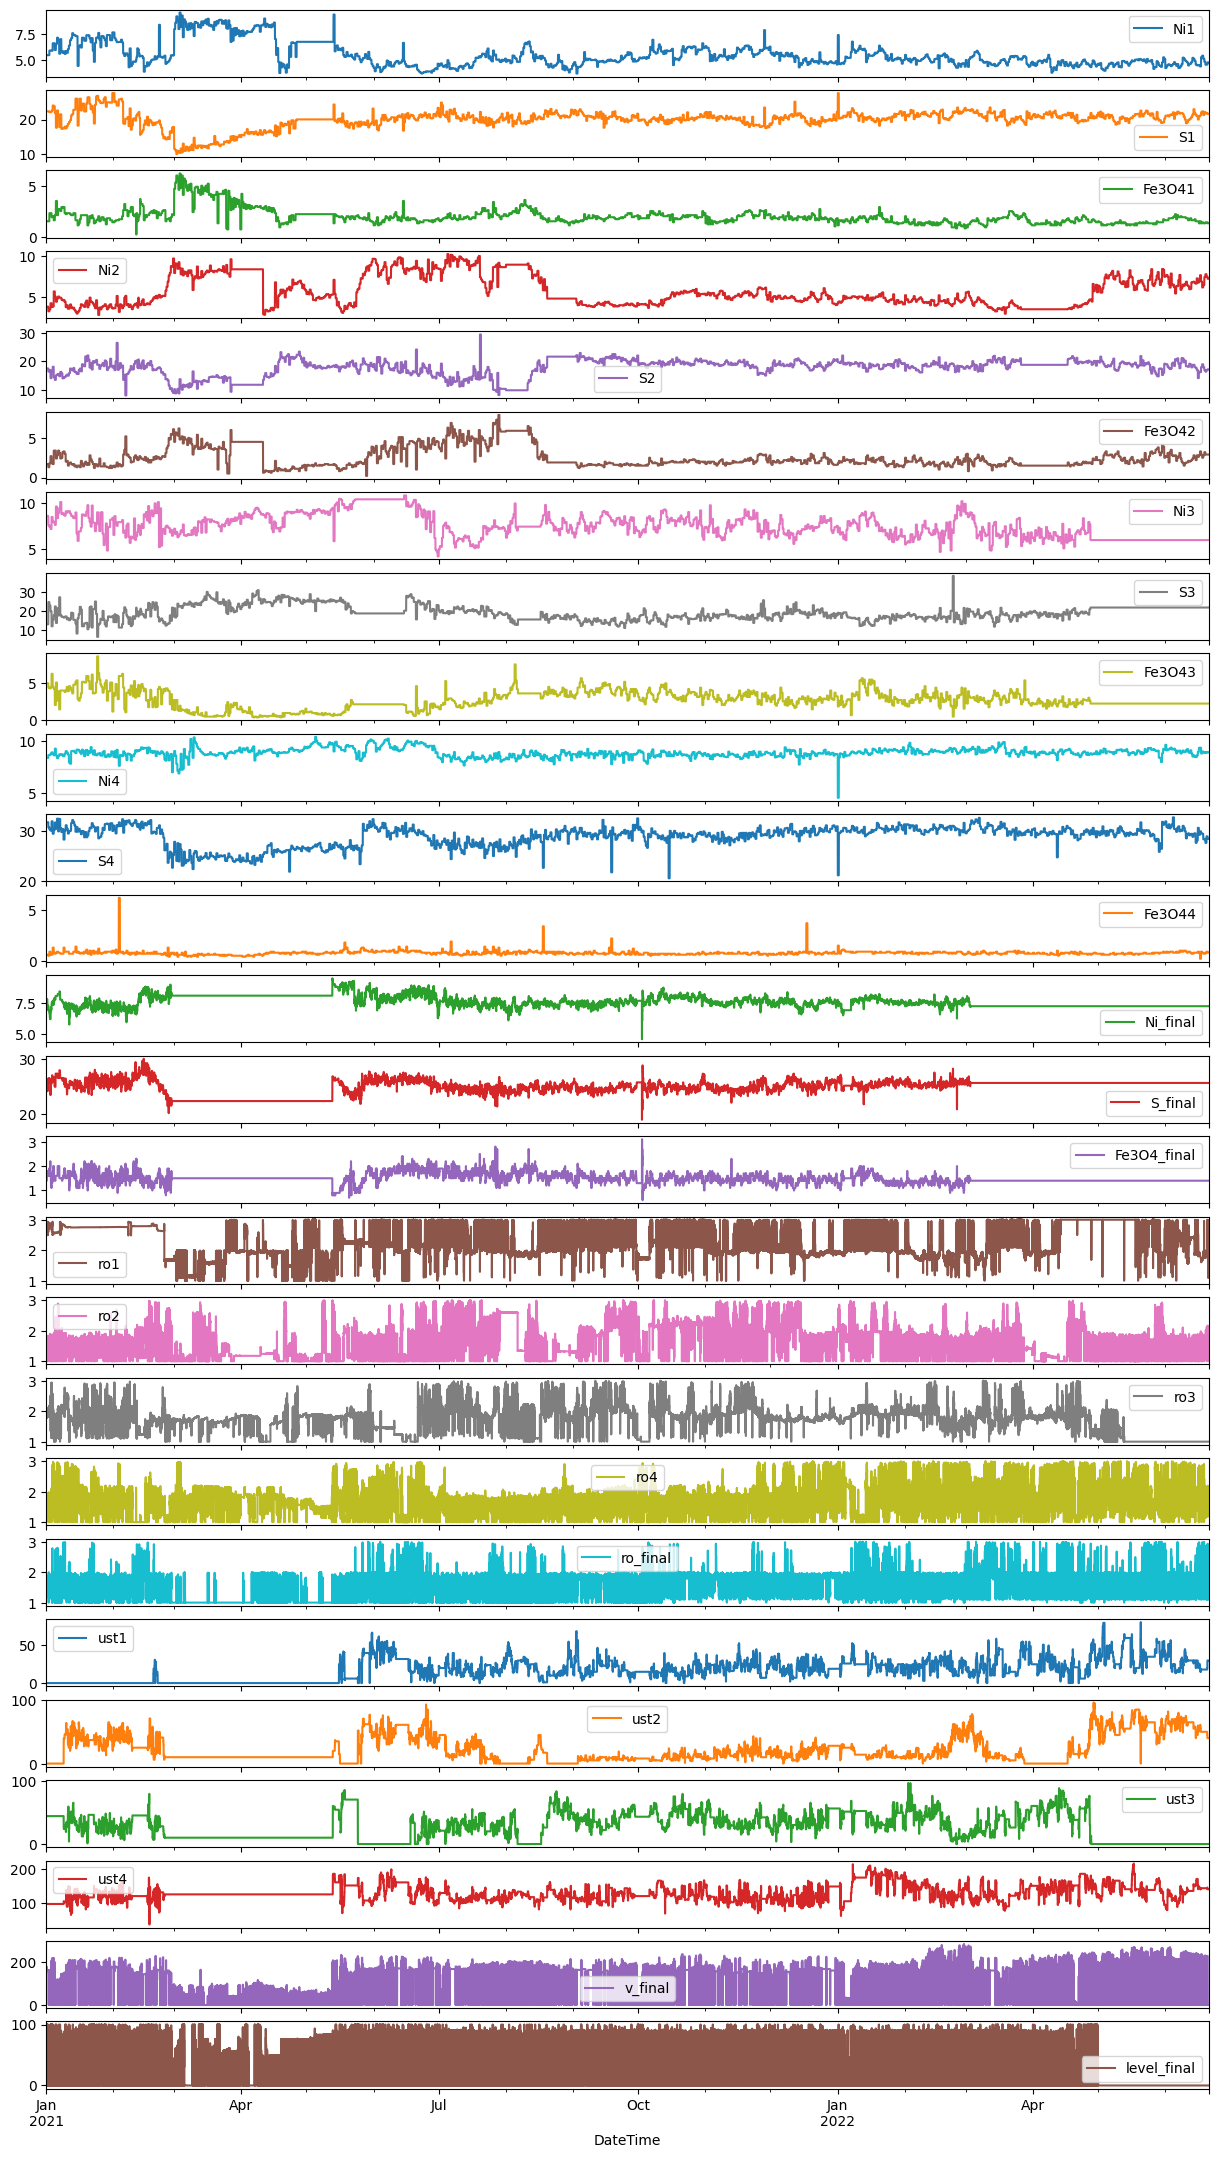

In [17]:
data1.plot(subplots=True, figsize=(15, 27))
plt.show()

C:\Program Files (x86)\lib\site-packages\seaborn\categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


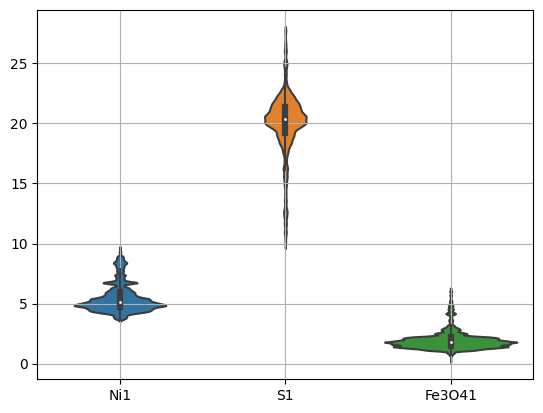

In [18]:
sns.violinplot(data1[['Ni1', 'S1', 'Fe3O41']])
plt.grid()

C:\Program Files (x86)\lib\site-packages\seaborn\categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


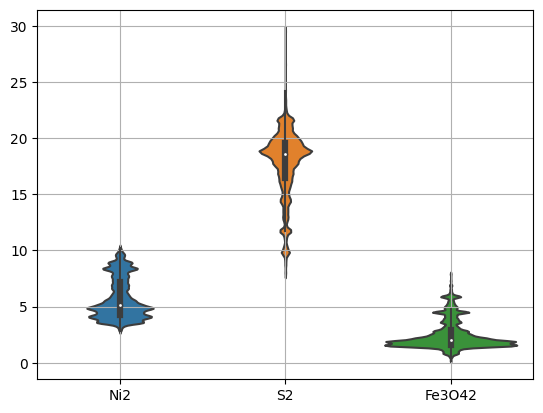

In [19]:
sns.violinplot(data1[['Ni2', 'S2', 'Fe3O42']])
plt.grid()

C:\Program Files (x86)\lib\site-packages\seaborn\categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


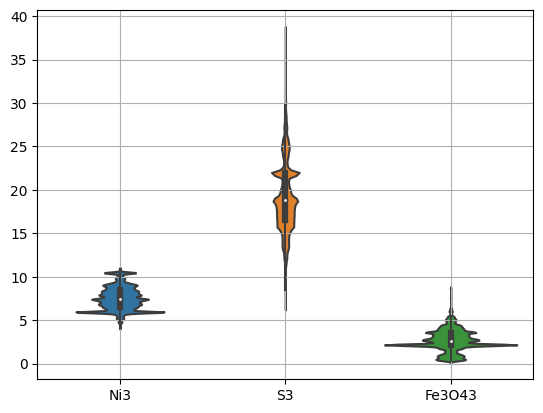

In [20]:
sns.violinplot(data1[['Ni3', 'S3', 'Fe3O43']])
plt.grid()

C:\Program Files (x86)\lib\site-packages\seaborn\categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


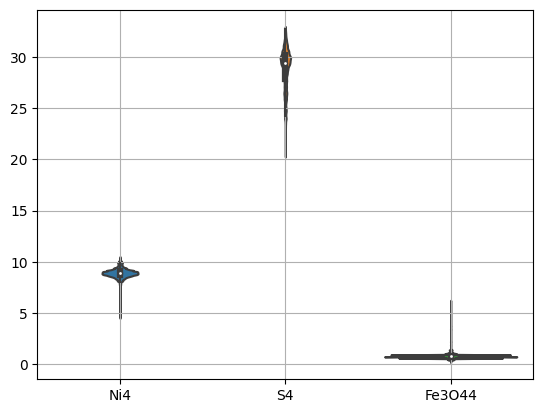

In [21]:
sns.violinplot(data1[['Ni4', 'S4', 'Fe3O44']])
plt.grid()

Поиск выбросов интерквартильным размахом

In [19]:
Q1, Q3 = data1['Fe3O44'].quantile([0.25, 0.75])
IQR = Q3 - Q1
down, up = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
data1[(data1['Fe3O44'] < down) | (data1['Fe3O44'] > up)]

,Ni1,S1,Fe3O41,Ni2,S2,Fe3O42,Ni3,S3,Fe3O43,Ni4,...,ro2,ro3,ro4,ro_final,ust1,ust2,ust3,ust4,v_final,level_final
DateTime,,,,,,,,,,,,,,,,,,,,,
2021-01-01 23:59:00,5.45,22.39,1.5,3.31,16.43,1.3,7.59,24.73,4.4,8.68,...,1.80805,2.02265,1.00000,1.7878,0.0,0.0,44.0,97.0,161.0,65.6654
2021-01-02 00:00:00,5.45,22.39,1.5,3.31,16.43,1.3,7.59,24.73,4.4,8.68,...,1.80615,2.02270,1.00000,1.7850,0.0,0.0,44.0,97.0,161.0,65.0061
2021-01-02 00:01:00,5.45,22.39,1.5,3.31,16.43,1.3,7.59,24.73,4.4,8.68,...,1.80465,2.02215,1.00000,1.7826,0.0,0.0,44.0,97.0,161.0,64.3468
2021-01-02 00:02:00,5.45,22.39,1.5,3.31,16.43,1.3,7.59,24.73,4.4,8.68,...,1.80205,2.02240,1.00000,1.7818,0.0,0.0,44.0,97.0,161.0,64.0293
2021-01-02 00:03:00,5.45,22.39,1.5,3.31,16.43,1.3,7.59,24.73,4.4,8.68,...,1.80070,2.02250,1.00000,1.7836,0.0,0.0,44.0,97.0,161.0,63.3211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-17 11:35:00,4.35,21.20,1.5,7.68,16.20,3.3,5.94,21.90,2.2,9.39,...,1.19980,1.00000,2.29900,1.9177,18.0,50.0,0.0,143.0,126.0,-1.0000
2022-06-17 11:36:00,4.35,21.20,1.5,7.68,16.20,3.3,5.94,21.90,2.2,9.39,...,1.19220,1.00000,2.29880,1.9092,18.0,50.0,0.0,143.0,126.0,-1.0000
2022-06-17 11:37:00,4.35,21.20,1.5,7.68,16.20,3.3,5.94,21.90,2.2,9.39,...,1.18470,1.00000,2.29855,1.9007,18.0,50.0,0.0,143.0,126.0,-1.0000


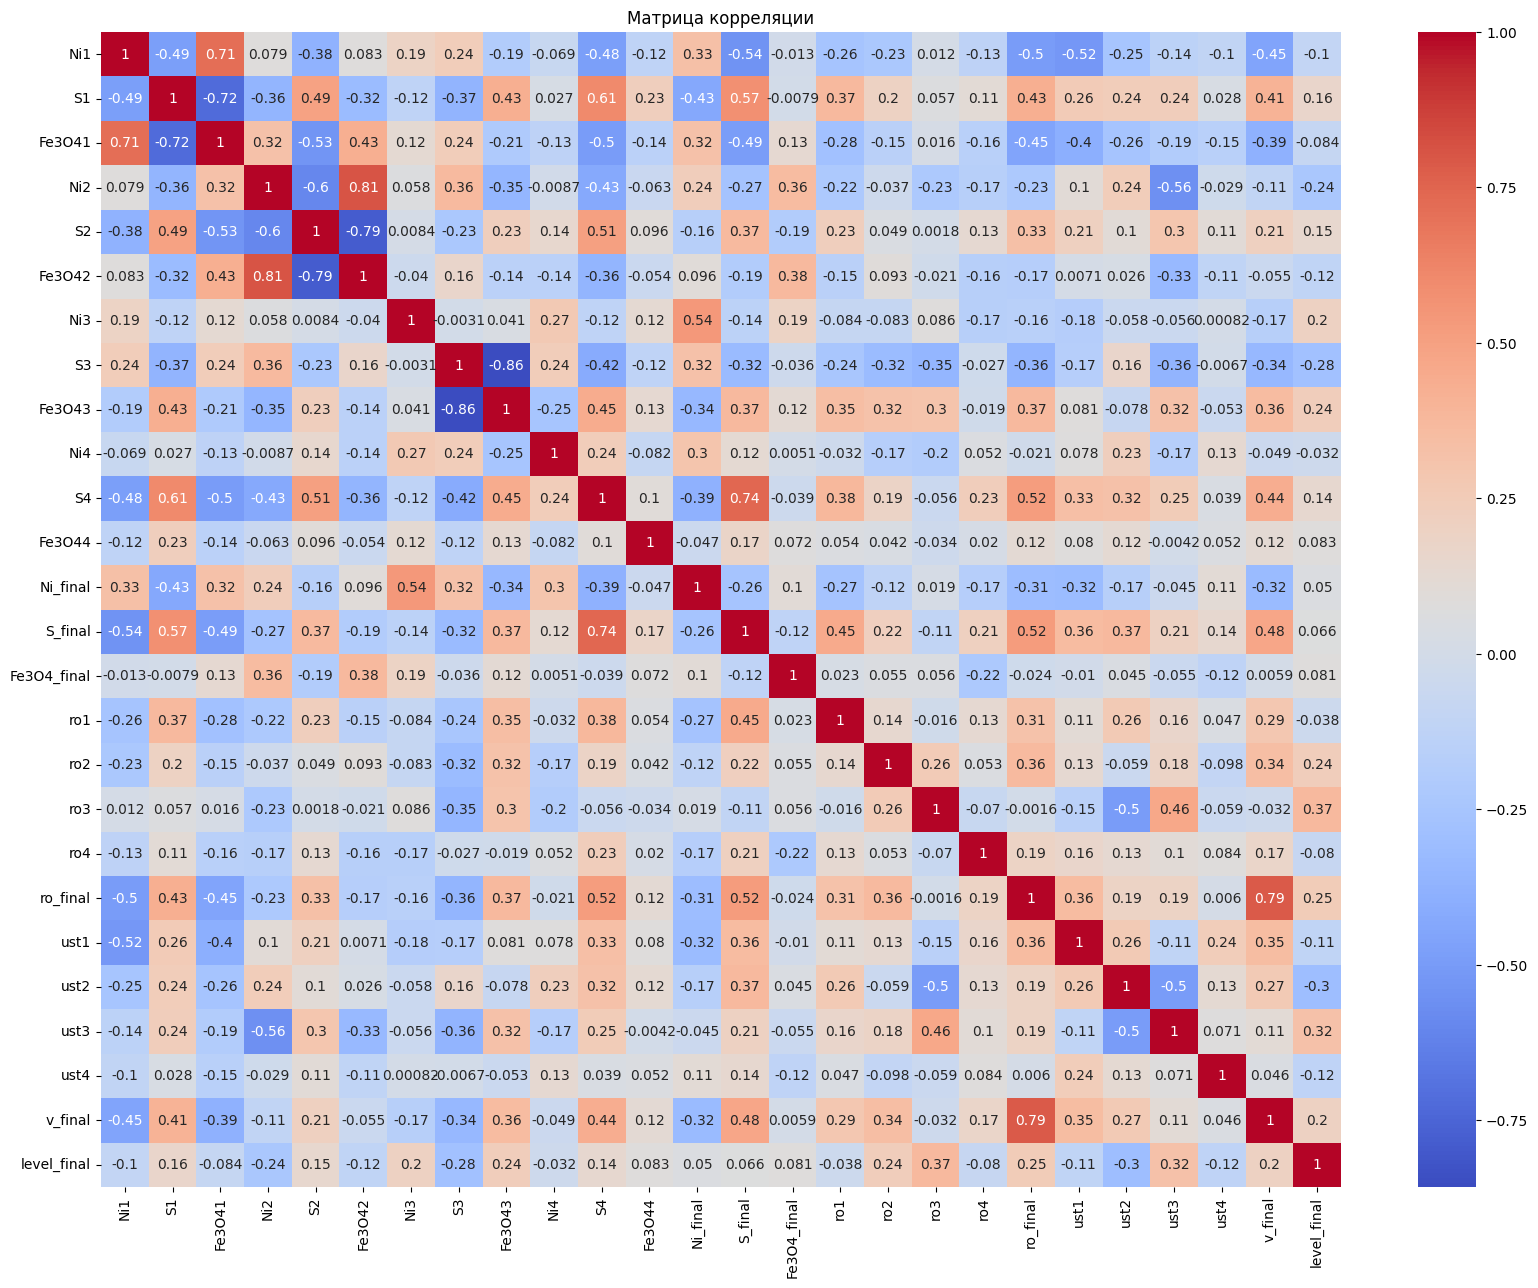

In [20]:
plt.figure(figsize=(20, 15))
sns.heatmap(data1.corr(), annot=True, cmap='coolwarm')
plt.title('Матрица корреляции')
plt.show()

In [21]:
M1 = data1[['Ni1', 'S1', 'Fe3O41']].sum(axis=1)
M2 = data1[['Ni2', 'S2', 'Fe3O42']].sum(axis=1)
M3 = data1[['Ni3', 'S3', 'Fe3O43']].sum(axis=1)
M4 = data1[['Ni4', 'S4', 'Fe3O44']].sum(axis=1)
M = np.array([M1, M2, M3, M4])
M

array([[29.34, 29.34, 29.34, ..., 27.65, 27.65, 27.65],
       [23.09, 23.09, 23.09, ..., 27.35, 27.35, 27.35],
       [26.83, 26.83, 26.83, ..., 30.04, 30.04, 30.04],
       [40.73, 40.73, 40.73, ..., 38.13, 38.13, 38.13]])

Сумма всех элементов из начальных ёмкостей не равна 100%, это значит, что в данных не приведены некоторые другие составляющие растворов

Решаем задачу регрессии, т.к. на выходе хотим получить действительное число

## Формулы
$$v_{final} = \sum_{i = 1}^4 v_i; \rho = \frac{m}{v} \Rightarrow m_i = \rho_i v_i; m_{final} = \sum_{i = 1}^4 m_i$$
$$\rho_{final} = \frac{m_{final}}{v_{final}}$$
## Ограничения

In [22]:
V = 13.53
rho = (1.0, 2.5)
ro_target = (1.85, 2.5)
Ni_target = (7.5 * (1 - 0.03), 7.5 * (1 + 0.03))
S_target = (25.5 * (1 - 0.03), 25.5 * (1 + 0.03))
Fe_target = (38 * (1 - 0.03), 38 * (1 + 0.03))
Fe3O4_target = (1.7 * (1 - 0.03), 1.7 * (1 + 0.03))
Fe3O4_target

(1.649, 1.751)

In [75]:
ust = data1[['ust1', 'ust2', 'ust3', 'ust4']].set_axis(['1', '2', '3', '4'], axis=1)
Ni = data1[['Ni1', 'Ni2', 'Ni3', 'Ni4']].set_axis(['1', '2', '3', '4'], axis=1)
S = data1[['S1', 'S2', 'S3', 'S4']].set_axis(['1', '2', '3', '4'], axis=1)
Fe3O4 = data1[['Fe3O41', 'Fe3O42', 'Fe3O43', 'Fe3O44']].set_axis(['1', '2', '3', '4'], axis=1)

<AxesSubplot: >

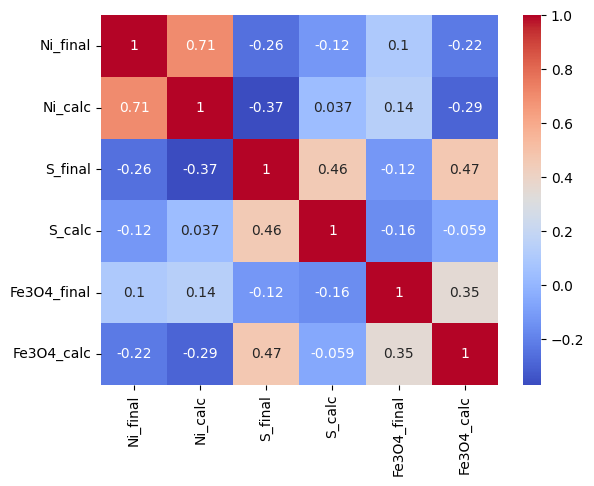

In [93]:
Ni_pred = pd.concat([data1['Ni_final'], (ust.mul(Ni).sum(axis=1) / ust.sum(axis=1))], axis=1).set_axis(['Ni_final', 'Ni_calc'], axis=1)
S_pred = pd.concat([data1['S_final'], (ust.mul(S).sum(axis=1) / ust.sum(axis=1))], axis=1).set_axis(['S_final', 'S_calc'], axis=1)
Fe3O4_pred = pd.concat([data1['Fe3O4_final'], (ust.mul(Fe3O4).sum(axis=1) / ust.sum(axis=1))], axis=1).set_axis(['Fe3O4_final', 'Fe3O4_calc'], axis=1)

sns.heatmap(pd.concat([Ni_pred, S_pred, Fe3O4_pred], axis=1).corr(), annot=True, cmap='coolwarm')

<AxesSubplot: xlabel='DateTime'>

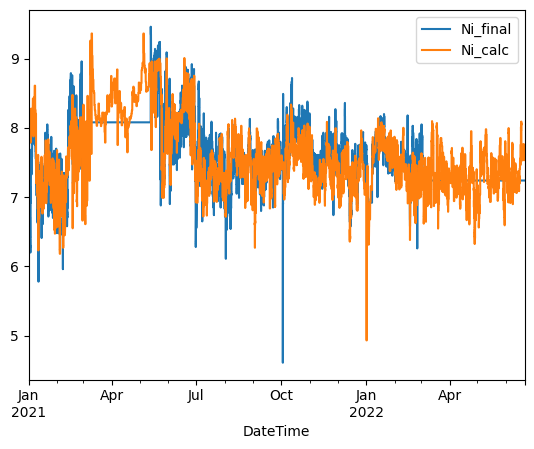

In [94]:
X = Ni_pred['Ni_calc'].to_numpy().reshape(-1, 1)
y = Ni_pred['Ni_final'].to_numpy()

lr = LinearRegression(n_jobs=-1, fit_intercept=False).fit(X, y)

pd.concat([Ni_pred.iloc[:, 0], Ni_pred.iloc[:, 1] * lr.coef_[0]], axis=1).plot()

<AxesSubplot: xlabel='DateTime'>

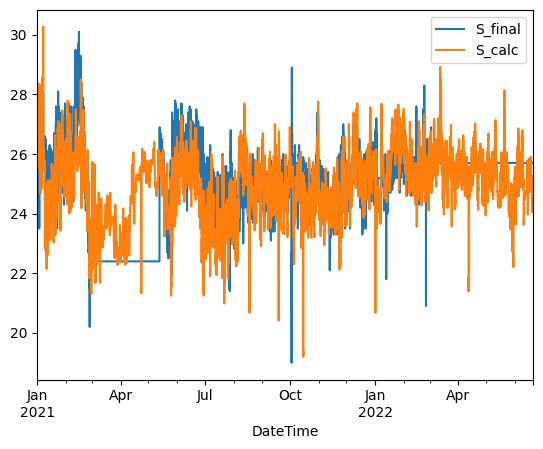

In [95]:
X = S_pred['S_calc'].to_numpy().reshape(-1, 1)
y = S_pred['S_final'].to_numpy()

lr = LinearRegression(n_jobs=-1, fit_intercept=False).fit(X, y)

pd.concat([S_pred.iloc[:, 0], S_pred.iloc[:, 1] * lr.coef_[0]], axis=1).plot()

<AxesSubplot: xlabel='DateTime'>

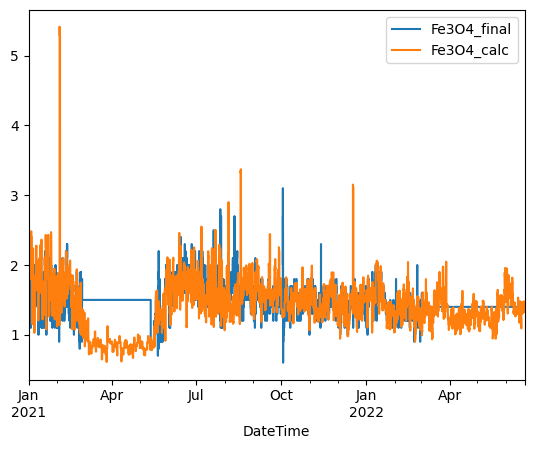

In [96]:
X = Fe3O4_pred['Fe3O4_calc'].to_numpy().reshape(-1, 1)
y = Fe3O4_pred['Fe3O4_final'].to_numpy()

lr = LinearRegression(n_jobs=-1, fit_intercept=False).fit(X, y)

pd.concat([Fe3O4_pred.iloc[:, 0], Fe3O4_pred.iloc[:, 1] * lr.coef_[0]], axis=1).plot()